In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk. corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

In [2]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

<IPython.core.display.Javascript object>

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


<IPython.core.display.Javascript object>

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [10]:
# loading training dataset
train_df = pd.read_csv('D:\Prodigy Infotech\Task 3/twitter_training.csv')
train_df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [11]:
train_df.columns = ['id', 'information', 'type', 'text']
train_df.head()

,id,information,type,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [12]:
# Loading validation dataset
validation_df = pd.read_csv('D:/Prodigy Infotech/Task 3/twitter_validation.csv')
validation_df.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [13]:
validation_df.columns = ['id', 'information', 'type', 'text']
validation_df.head()

,id,information,type,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [14]:
# checking shape of training and validation datasets
print(f'Shape of training dataset is {train_df.shape}.')
print(f'Shape of validation dataset is {validation_df.shape}.')

Shape of training dataset is (74681, 4).
Shape of validation dataset is (999, 4).


In [17]:
# Checking for missing values in trainind dataset
print('Missing values in the training dataset:')
print(train_df.isnull().sum())

Missing values in the training dataset:
id               0
information      0
type             0
text           686
dtype: int64


In [16]:
# Checking for missing values in validation dataset.
print('Missing values in validation dataset:')
print(validation_df.isnull().sum())

Missing values in validation dataset:
id             0
information    0
type           0
text           0
dtype: int64


In [19]:
# dropping missing values from text column
train_df.dropna(subset = ['text'], inplace = True)

In [20]:
# Check for missing values in training dataset
train_df.isnull().sum()

id             0
information    0
type           0
text           0
dtype: int64

In [21]:
train_df.shape

(73995, 4)

In [22]:
# checking info of training dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73995 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           73995 non-null  int64 
 1   information  73995 non-null  object
 2   type         73995 non-null  object
 3   text         73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [28]:
# checking distribution of emotions in training dataset.
train_df['type'].value_counts()

Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: type, dtype: int64

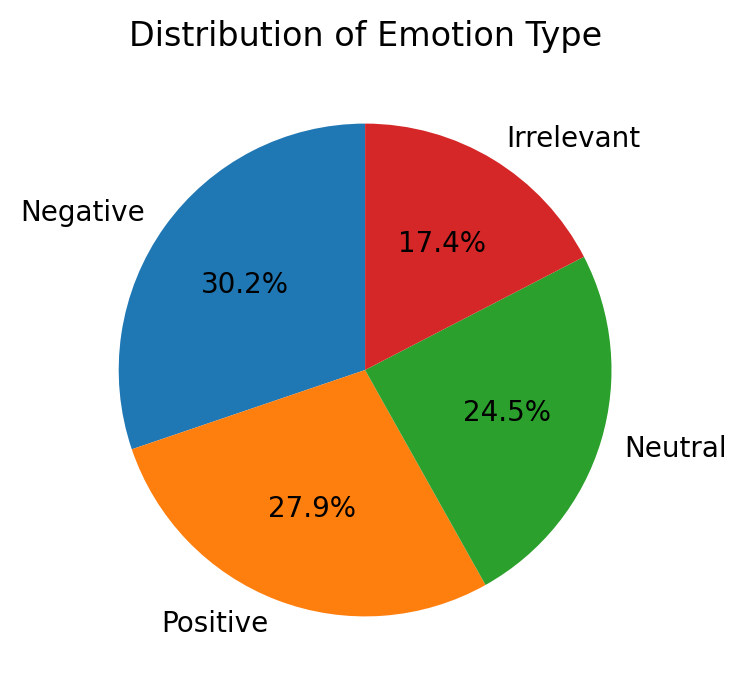

In [30]:
import matplotlib.pyplot as plt

# checking distribution of 'type' column
type_counts = train_df['type'].value_counts()

# plotting a pie chart
plt.figure(figsize = (4,4), dpi =200)
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle= 90)
plt.title('Distribution of Emotion Type')
plt.show()

In [33]:
# defining a function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and links
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization and removing stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [34]:
# Applying the preprocess_text function to the 'text' column
train_df['preprocessed_text'] = train_df['text'].apply(preprocess_text)
train_df

,id,information,type,text,preprocessed_text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands murder
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting borderlands murder
...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,realized windows partition mac like years behi...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,realized mac window partition years behind nvi...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,realized windows partition mac years behind nv...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,realized windows partition mac like years behi...


In [35]:
# Applying the preprocess_text function to the 'text' column of validation dataset
validation_df['preprocessed_text'] = validation_df['text'].apply(preprocess_text)
validation_df

,id,information,type,text,preprocessed_text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft pay word functions poorly samsungus ...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...
3,4433,Google,Neutral,Now the President is slapping Americans in the...,president slapping americans face really commi...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,hi eahelp ive madeleine mccann cellar past yea...
...,...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,toronto arts culture capital canada wonder wan...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,actually good move tot bring viewers one peopl...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,today sucked time drink wine n play borderland...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,bought fraction microsoft today small wins


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initiating the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features = 5000)

# Fit and transform the training data
tfidf_train_features = tfidf_vectorizer.fit_transform(train_df['preprocessed_text'])

# Transform the validation data using the same vectorizer
tfidf_validation_features = tfidf_vectorizer.transform(validation_df['preprocessed_text'])

# Display the shape of the TF-IDF features
print(f'TF-IDF Training Features shape: {tfidf_train_features.shape}')
print(f'TF_IDF Validation Features shape: {tfidf_validation_features.shape}')

TF-IDF Training Features shape: (73995, 5000)
TF_IDF Validation Features shape: (999, 5000)


In [37]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the class labels in both training and validation datasets
train_labels_encoded = label_encoder.fit_transform(train_df['type'])
validation_labels_encoded = label_encoder.transform(validation_df['type'])

In [38]:
# Importing xgboost 
import xgboost as xp

# initialize the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier()

# Train the classifier on the TF-IDF training features and encoded labels
xgb_classifier.fit(tfidf_train_features, train_labels_encoded)

# Predict the encoded labels for the TF-IDF validation features
validation_preds = xgb_classifier.predict(tfidf_validation_features)

# Decoding the predicted labels back to the original class labels
validation_predictions = label_encoder.inverse_transform(validation_preds)

<IPython.core.display.Javascript object>

In [40]:
# Evaluating performance of classifier
accuracy = accuracy_score(validation_df['type'], validation_predictions)
print(f"XGBoost Accuracy: {accuracy}")

XGBoost Accuracy: 0.7377377377377378


In [41]:
# Display additional classification metrics for XGBoost
print('Classification Report:')
print(classification_report(validation_df['type'], validation_predictions))


Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.85      0.60      0.70       171
    Negative       0.65      0.88      0.75       266
     Neutral       0.78      0.65      0.71       285
    Positive       0.76      0.78      0.77       277

    accuracy                           0.74       999
   macro avg       0.76      0.73      0.73       999
weighted avg       0.75      0.74      0.74       999



In [43]:
# displaying confusion matrix
confusion_matrix(validation_df['type'], validation_predictions)

array([[102,  27,  15,  27],
       [  2, 234,  19,  11],
       [ 10,  61, 185,  29],
       [  6,  36,  19, 216]], dtype=int64)

In [48]:
# Example user input
user_input = 'This is shitty. I get that profit-wise it was less business expected prior to a huge problem.'

# Preprocess the use input
preprocessed_input = preprocess_text(user_input)

# Vectorize the user input using TF-IDF
user_input_tf_idf = tfidf_vectorizer.transform([preprocessed_input])

# Predict the sentiment type using the trained XGBoost model
preds_encoded = xgb_classifier.predict(user_input_tf_idf)[0]

# Decoding the predicted label back to the original class label
predicted_type = label_encoder.inverse_transform([preds_encoded])[0]

print(f"The predicted type for the input text is: {predicted_type}.")

The predicted type for the input text is: Negative.
